In [455]:
import numpy as np
import pandas as pd
from keras.preprocessing import image 
from pathlib import Path 

### Data Preparation 

In [456]:
testid = pd.read_csv('pokemontest.csv')
testid_array = testid.values

In [457]:
##print(testid_array)

### Train Data preparation 

In [458]:
p = Path('C:/Users/91797/PokemonTrain/Images')

In [459]:
image_data = []
image_label = []
image_id = []

In [460]:
count = 0

for image_path in p.glob("*.jpg"):
    count += 1
    ##print(image_path)
    ids = str(image_path).split('\\')[-1]
    ##print(image_id)
    img = image.load_img(image_path, target_size = (200,200))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    image_id.append(ids)
    ### image with label 0 = Pikachu
    ### image with label 1 = Bulbasaur
    ### image with label 2 = Charmender
    if count < 102:
        image_label.append (0)
    elif (count > 101 and count < 203) :
        image_label.append (1)
    else :
        image_label.append (2)

c:\users\91797\appdata\local\programs\python\python39\lib\site-packages\PIL\Image.py:951: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [461]:
print(len(image_data))
print(len(image_label))
print(len(image_id))

304
304
304


### Test Data Preparation 

In [462]:
testp = Path('C:/Users/91797/PokemonTest images/Images')

In [463]:
testimage_data = []
testimage_id = []

In [464]:
count = 0

for testimage_path in testp.glob("*.jpg"):
    ##print(testimage_path)
    ids = str(testimage_path).split('\\')[-1]
    ##print(testimage_id)
    testimg = image.load_img(testimage_path, target_size = (200,200))
    testimg_array = image.img_to_array(testimg)
    testimage_data.append(testimg_array)
    testimage_id.append(ids)

In [465]:
print(len(testimage_id))
print(len(testimage_data))


123
123


### Converting data into NumPy array 

In [466]:
### Train data
image_data = np.array(image_data, dtype = 'float32')/255.0
image_label = np.array(image_label)

### Test data
testimage_data = np.array(testimage_data, dtype = 'float32')/255.0

In [467]:
print(image_data.shape)
print(testimage_data.shape)

(304, 200, 200, 3)
(123, 200, 200, 3)


In [468]:
print(image_label.shape)

(304,)


In [469]:
print(len(image_id))
print(len(testimage_id))

304
123


### Randomise the data 

In [470]:
import random 

In [471]:
## Randomisation is done for better predictions 

## Both the image_data and image_label are combined so that the labels are not mismatched 
combined_data = list (zip (image_data, image_label, image_id))
random.shuffle(combined_data)

## Unzip the data 
image_data, image_label, image_id = zip(*combined_data)

### Visualise the training data

In [472]:
from matplotlib import pyplot as plt 

In [473]:
def dispImg (img):
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return 

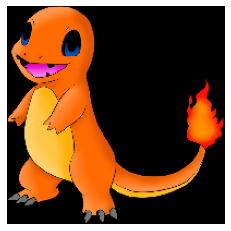

2
536.jpg


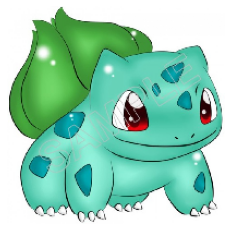

1
454.jpg


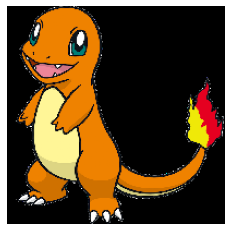

2
520.jpg


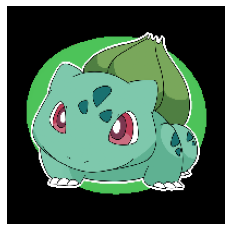

1
413.jpg


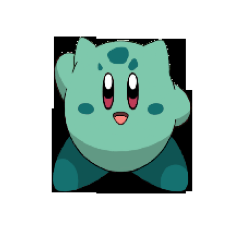

1
489.jpg


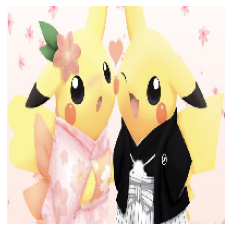

0
395.jpg


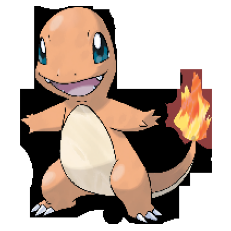

2
542.jpg


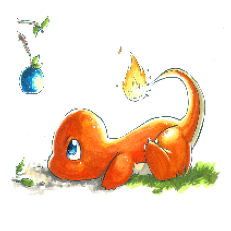

2
577.jpg


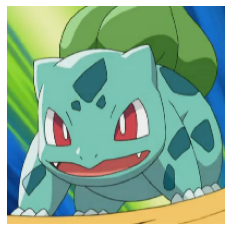

1
444.jpg


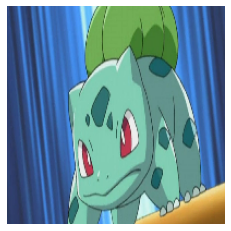

1
448.jpg


In [474]:
for i in range(10):
    dispImg (image_data[i])
    print(image_label[i])
    print(image_id[i])

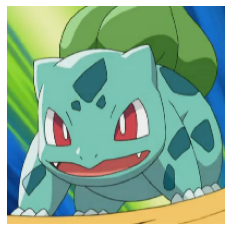

536.jpg


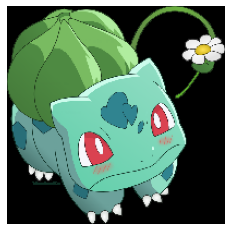

454.jpg


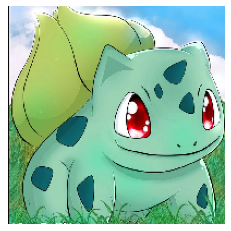

520.jpg


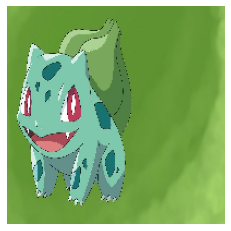

413.jpg


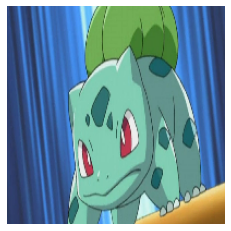

489.jpg


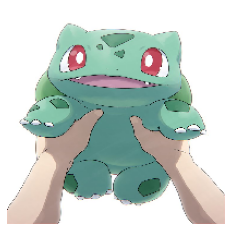

395.jpg


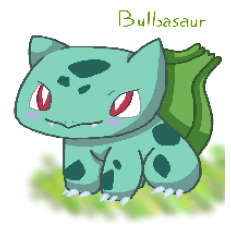

542.jpg


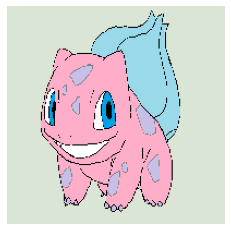

577.jpg


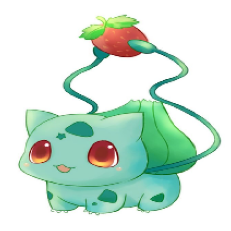

444.jpg


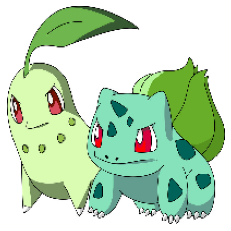

448.jpg


In [475]:
for i in range(10):
    dispImg (testimage_data[i])
    print(image_id[i])

### SVM Implementation 

In [476]:
class SVM:
    def __init__ (self, C = 1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss (self, X, Y, W, b):
        loss = 0.0 
        loss += 0.5*np.dot(W, W.T)
        
        m = X.shape[0]
        for i in range (m):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            
            loss += self.C * max(0, (1 - ti))
        
        return loss[0][0]
    
    def fit (self, X, Y, batch_size = 100, learning_rate = 0.001, maxIter = 100):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate 
        c = self.C 
        W = np.zeros((1, no_of_features))
        bias = 0
        
        print (self.hingeLoss(X, Y, W, bias))
        
        ### Training starts from here 
        Losses = []
        
        for i in range (maxIter):
            l = self.hingeLoss(X, Y, W, bias)
            Losses.append(l)
            ### We will use batch gradient with random shuffle 
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in range (0, no_of_samples, batch_size):
                
                ## Assume gradient as 0
                gradW = 0
                gradB = 0
                
                for j in range (batch_start, batch_start+batch_size):
                    
                    if j<no_of_samples :
                        i = ids[j]
                        ti = Y[i] * (np.dot(W, X[i].T) + bias)
                        
                        if ti>1:
                            gradW += 0
                            gradB += 0
                            
                        else:
                            gradW += c*Y[i]*X[i]
                            gradB += c*Y[i]
                            
                ### Update W, b
                W = W - n*W + n*gradW 
                bias = bias + n*gradB 
                      
        self.W = W 
        self.b = bias 
        return W, bias, Losses

### Converting data into NumPy array 

In [477]:
### Train data
image_data = np.array(image_data, dtype = 'float32')/255.0
image_label = np.array(image_label)

### Test data
testimage_data = np.array(testimage_data, dtype = 'float32')/255.0


In [478]:
type(image_data
    )
image_data[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

### Convert data into one vs one classification 

In [479]:
image_data = image_data.reshape(image_data.shape[0], -1)
print(image_data.shape)

testimage_data = testimage_data.reshape(testimage_data.shape[0], -1)
print(testimage_data.shape)

(304, 120000)
(123, 120000)


In [480]:
Classes = len(np.unique(image_label))
print(Classes)

3


In [481]:
def classWiseData (x, y):
    data = {}
    for i in range (Classes):
        data[i] = []
    
    for i in range (x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [482]:
data = classWiseData(image_data, image_label)

In [483]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])


101
101
102


### Combine Data into a Single Matrix

In [484]:
def getDataPairForSVM(d1, d2):
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples, features))
    data_labels = np.zeros((samples, ))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = 1
    
    return data_pair, data_labels 

### Training NC2 svm 

In [485]:
mysvm = SVM()

In [486]:
def trainSVMs(x, y):
    
    svm_classifiers = {}
    
    for i in range(Classes):
        svm_classifiers[i] = {}
        for j in range(i+1, Classes):
            xpair, ypair = getDataPairForSVM(data[i], data[j])
            wt, b, loss = mysvm.fit(xpair, ypair, learning_rate = 0.002, maxIter = 1000)
            svm_classifiers[i][j] = (wt, b)
            plt.plot(loss)
            plt.show()
    return svm_classifiers 

202.0


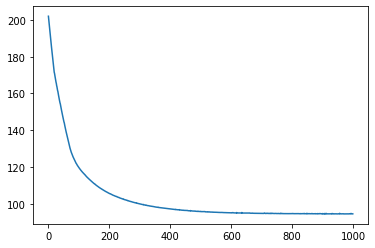

203.0


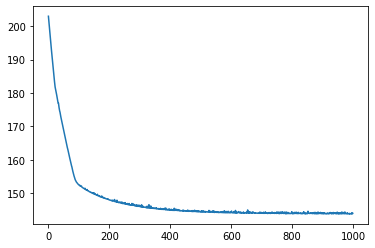

203.0


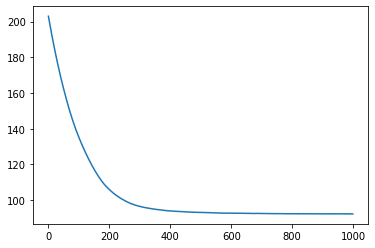

In [487]:
svm_classifier = trainSVMs(image_data, image_label)

### Predictions 

In [488]:
def binaryPredict (x, w, b):
    z = np.dot(x, w.T) + b
    if z >= 0:
        return 1
    else :
        return -1 

In [489]:
def predict(x):
    
    counts = np.zeros((Classes,))
    
    for i in range (Classes):
        for j in range (i+1, Classes):
            wt, b = svm_classifier[i][j]
            z = binaryPredict(x, wt, b)
            
            if z == 1:
                counts[j] += 1
            else:
                counts[i] += 1
                
    final_predictions = np.argmax(counts)
    return final_predictions 

In [490]:
print(predict(image_data[1]))
print(image_label[1])

1
1


In [491]:
def accuracy(x, y):
    count = 0
    for i in range(x.shape[0]):
        pred = predict(x[i])
        if y[i] == pred:
            count += 1
    return count/x.shape[0]

In [492]:
acc = accuracy(image_data, image_label)
print(acc)

0.7269736842105263


In [366]:
print(testid_array.shape[0])

123


In [423]:
print(testid_array[0])
print(type(testid_array))

['1106.jpg']
<class 'numpy.ndarray'>


In [336]:
testimage_id.shape

(123,)

In [362]:
print(testimage_id.index(testid_array[0]))

6


In [413]:
type(testimage_data)
print(testimage_data.shape)

(123, 120000)


In [447]:
final_pred = []

for i in range(testid_array.shape[0]):
    
    idx = testimage_id.index(testid_array[i])
    pred = predict(testimage_data[idx])
    
    if pred == 0:
        final_pred.append('Pikachu')
    elif pred == 1:
        final_pred.append('Bulbasaur')
    else :
        final_pred.append('Charmander')

In [448]:
testid_array = testid_array.reshape(testid_array.shape[0], 1)
testid_array.shape

(123, 1)

In [449]:
final_pred = np.array(final_pred)
final_pred = final_pred.reshape(final_pred.shape[0],1)
final_pred.shape

(123, 1)

In [450]:
final_pred = np.hstack((testid_array, final_pred))
print(final_pred)

[['1106.jpg' 'Bulbasaur']
 ['2236.jpg' 'Pikachu']
 ['1131.jpg' 'Bulbasaur']
 ['2221.jpg' 'Pikachu']
 ['2011.jpg' 'Charmander']
 ['2030.jpg' 'Charmander']
 ['2035.jpg' 'Pikachu']
 ['1110.jpg' 'Bulbasaur']
 ['1104.jpg' 'Bulbasaur']
 ['2217.jpg' 'Charmander']
 ['1111.jpg' 'Bulbasaur']
 ['1100.jpg' 'Bulbasaur']
 ['1112.jpg' 'Bulbasaur']
 ['1138.jpg' 'Bulbasaur']
 ['2238.jpg' 'Charmander']
 ['2009.jpg' 'Bulbasaur']
 ['2225.jpg' 'Charmander']
 ['2240.jpg' 'Charmander']
 ['2020.jpg' 'Pikachu']
 ['2209.jpg' 'Charmander']
 ['2029.jpg' 'Pikachu']
 ['1114.jpg' 'Bulbasaur']
 ['2201.jpg' 'Pikachu']
 ['1118.jpg' 'Bulbasaur']
 ['2025.jpg' 'Bulbasaur']
 ['2202.jpg' 'Pikachu']
 ['1117.jpg' 'Bulbasaur']
 ['1119.jpg' 'Pikachu']
 ['2000.jpg' 'Pikachu']
 ['2007.jpg' 'Pikachu']
 ['2039.jpg' 'Pikachu']
 ['2017.jpg' 'Pikachu']
 ['2215.jpg' 'Charmander']
 ['1120.jpg' 'Bulbasaur']
 ['2006.jpg' 'Pikachu']
 ['1116.jpg' 'Bulbasaur']
 ['1128.jpg' 'Bulbasaur']
 ['1125.jpg' 'Bulbasaur']
 ['2203.jpg' 'Charmander']
 ['

In [453]:
final_df = pd.DataFrame(final_pred, columns = ["ImageId","NameOfPokemon"])

In [454]:
final_df.to_csv("Pokemon_submission.csv", index = False)